In [4]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Read photometry catalogue created by my other script
photfilename = 'ESO323_out_REMIR_ROS2_phot_v02.fits'
data = fits.getdata(photfilename, 1)

# The photometry catalogue contains aperture photometry in 25 different
# apertures. If we number them 0..24, they correspond to diameters 1..25 arcsec
apno = 11 # This is then 11 arcsec

# The photometry catalogue contains photometry for the AGN plus some more
# objects in the field, in this case the AGN + 6 more objetcs, so 7 in
# total. The AGN is number 1, and the others 2, 3, etc.
# This is seen in the column names, which end in _1, _2, etc.
# E.g. the column MAG_APER_1 contains the aperture magnitudes (for all
# 25 apertures) for the AGN.

# Get the aperture magnitudes
##foo = data['MAG_APER_1'] # has shape e.g. (767, 25), the 25 being the apertures
mag_agn  = data['MAG_APER_1'][:,apno]
mag_ref1 = data['MAG_APER_2'][:,apno] # I have found that _3 is good here
mag_ref2 = data['MAG_APER_3'][:,apno]

# Get the differential magnitudes
delta_mag_agn_ref1 = mag_agn - mag_ref1
delta_mag_ref2_ref1 = mag_ref2 - mag_ref1

# Get the magnitude errors 
magerr_agn = data['MAGERR_APER_1'][:,apno]
magerr_ref1 = data['MAGERR_APER_2'][:,apno]
magerr_ref2= data['MAGERR_APER_3'][:,apno]

# Get the differential magnitudes error
delta_magerr_agn_ref1 = np.sqrt(magerr_agn**2 + magerr_ref1**2)
delta_magerr_ref2_ref1 = np.sqrt(magerr_ref2**2 + magerr_ref1**2)

# Get the differential magnitudes error
delta_magerr_agn_ref1 = np.sqrt(magerr_agn**2 + magerr_ref1**2)
delta_magerr_ref2_ref1 = np.sqrt(magerr_ref2**2 + magerr_ref1**2)
errlim = 0.1 #max error value

# TODO Here I could loop over the filters, subtracting the median

# For simplicity "extract" some arrays from the data
filt = data['filter']
mjd_obs = data['mjd_obs']

# A simple plot of the J band differential mags, with the median subtracted
# Do 'H' and 'K' in the same way
maskJ = (filt == 'J')
#J band data
#Remove NaN
Jtemp=delta_mag_agn_ref1[maskJ]
Jisnan=~np.isnan(Jtemp)
xJ=np.asarray(mjd_obs[maskJ][Jisnan], dtype=float)
nJ=len(xJ)
XJ = np.reshape(xJ,(nJ,1))
yJ=np.asarray(delta_mag_agn_ref1[maskJ][Jisnan]-np.median(delta_mag_agn_ref1[maskJ][Jisnan]), dtype=float)
yJerr = np.asarray(delta_magerr_agn_ref1[maskJ][Jisnan], dtype=float)
#Remove >errlim mag errors
xJ=xJ[yJerr<errlim]
nJ=len(xJ)
XJ = np.reshape(xJ,(nJ,1))
yJ=yJ[yJerr<errlim]
yJerr = yJerr[yJerr<errlim]
#remove values 
xJ=xJ[(yJ>-0.4) & (yJ<0.4)]
nJ=len(xJ)
XJ = np.reshape(xJ,(nJ,1))
yJerr=yJerr[(yJ>-0.4) & (yJ<0.4)]
yJ=yJ[(yJ>-0.4) & (yJ<0.4)]

#H band data
#Remove NaN
maskH = (filt == 'H')
Htemp=delta_mag_agn_ref1[maskH]
Hisnan=~np.isnan(Htemp)
xH=np.asarray(mjd_obs[maskH][Hisnan], dtype=float)
nH=len(xH)
XH = np.reshape(xH,(nH,1))
yH=np.asarray(delta_mag_agn_ref1[maskH][Hisnan]-np.median(delta_mag_agn_ref1[maskH][Hisnan]), dtype=float)
yHerr = np.asarray(delta_magerr_agn_ref1[maskH][Hisnan], dtype=float)
#Remove >errlim mag errors
xH=xH[yHerr<errlim]
nH=len(xH)
XH = np.reshape(xH,(nH,1))
yH=yH[yHerr<errlim]
yHerr = yHerr[yHerr<errlim]

#K band data
#Remove NaN
maskK = (filt == 'K')
xK=np.asarray(mjd_obs[maskK], dtype=float)
nK=len(xK)
XK = np.reshape(xK,(nK,1))
yK=np.asarray(delta_mag_agn_ref1[maskK]-np.median(delta_mag_agn_ref1[maskK]), dtype=float)
yKerr = np.asarray(delta_magerr_agn_ref1[maskK], dtype=float)
#Remove >errlim mag errors
xK=xK[yKerr<errlim]
nK=len(xK)
XK = np.reshape(xK,(nK,1))
yK=yK[yKerr<errlim]
yKerr = yKerr[yKerr<errlim]

#g band data
#Remove NaN
maskg = (filt == 'g')
gtemp=delta_mag_agn_ref1[maskg]
gisnan=~np.isnan(gtemp)
xg=np.asarray(mjd_obs[maskg][gisnan], dtype=float)
ng=len(xg)
Xg = np.reshape(xg,(ng,1))
yg=np.asarray(delta_mag_agn_ref1[maskg][gisnan]-np.median(delta_mag_agn_ref1[maskg][gisnan]), dtype=float)
ygerr = np.asarray(delta_magerr_agn_ref1[maskg][gisnan], dtype=float)
#Remove >errlim mag errors
xg=xg[ygerr<errlim]
ng=len(xg)
Xg = np.reshape(xg,(ng,1))
yg=yg[ygerr<errlim]
ygerr = ygerr[ygerr<errlim]
#remove values 
xg=xg[(yg>-0.4) & (yg<0.4)]
ng=len(xg)
Xg = np.reshape(xg,(ng,1))
ygerr=ygerr[(yg>-0.4) & (yg<0.4)]
yg=yg[(yg>-0.4) & (yg<0.4)]

#r band data
#Remove NaN
maskr = (filt == 'r')
rtemp=delta_mag_agn_ref1[maskr]
risnan=~np.isnan(rtemp)
xr=np.asarray(mjd_obs[maskr][risnan], dtype=float)
nr=len(xr)
Xr = np.reshape(xr,(nr,1))
yr=np.asarray(delta_mag_agn_ref1[maskr][risnan]-np.median(delta_mag_agn_ref1[maskr][risnan]), dtype=float)
yrerr = np.asarray(delta_magerr_agn_ref1[maskr][risnan], dtype=float)
#Remove >errlim mag errors
xr=xr[yrerr<errlim]
nr=len(xr)
Xr = np.reshape(xr,(nr,1))
yr=yr[yrerr<errlim]
yrerr = yrerr[yrerr<errlim]
#remove values 
xr=xr[(yr>-0.2) & (yr<0.2)]
nr=len(xr)
Xr = np.reshape(xr,(nr,1))
yrerr=yrerr[(yr>-0.2) & (yr<0.2)]
yr=yr[(yr>-0.2) & (yr<0.2)]

#i band data
#Remove NaN
maski = (filt == 'i')
itemp=delta_mag_agn_ref1[maski]
iisnan=~np.isnan(itemp)
xi=np.asarray(mjd_obs[maski][iisnan], dtype=float)
ni=len(xi)
Xi = np.reshape(xi,(ni,1))
yi=np.asarray(delta_mag_agn_ref1[maski][iisnan]-np.median(delta_mag_agn_ref1[maski][iisnan]), dtype=float)
yierr = np.asarray(delta_magerr_agn_ref1[maski][iisnan], dtype=float)
#Remove >errlim mag errors
xi=xi[yierr<errlim]
ni=len(xi)
Xi = np.reshape(xi,(ni,1))
yi=yi[yierr<errlim]
yierr = yierr[yierr<errlim]
#remove values 
xi=xi[(yi>-0.4) & (yi<0.4)]
ni=len(xi)
Xi= np.reshape(xi,(ni,1))
yierr=yierr[(yi>-0.4) & (yi<0.4)]
yi=yi[(yi>-0.4) & (yi<0.4)]

#z band data
#Remove NaN
maskz = (filt == 'z')
ztemp=delta_mag_agn_ref1[maskz]
zisnan=~np.isnan(ztemp)
xz=np.asarray(mjd_obs[maskz][zisnan], dtype=float)
nz=len(xz)
Xz = np.reshape(xz,(nz,1))
yz=np.asarray(delta_mag_agn_ref1[maskz][zisnan]-np.median(delta_mag_agn_ref1[maskz][zisnan]), dtype=float)
yzerr = np.asarray(delta_magerr_agn_ref1[maskz][zisnan], dtype=float)
#Remove >errlim mag errors
xz=xz[yzerr<errlim]
nz=len(xz)
Xz = np.reshape(xz,(nz,1))
yz=yz[yzerr<errlim]
yzerr = yzerr[yzerr<errlim]
#remove values 
xz=xz[(yz>-0.4) & (yz<0.4)]
nz=len(xz)
Xz = np.reshape(xz,(nz,1))
yzerr=yzerr[(yz>-0.4) & (yz<0.4)]
yz=yz[(yz>-0.4) & (yz<0.4)]

#time array with all bands
#be carefull with how XJ and xj acts 
X_tot= np.concatenate((xJ,xH,xK,xg,xr,xi,xz),axis=None)
X_tot=np.reshape(X_tot,(len(X_tot),1))

#combine all y values for guess
Y_tot= np.concatenate((yJ,yH,yK),axis=None)

/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in less
/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in less
/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in less


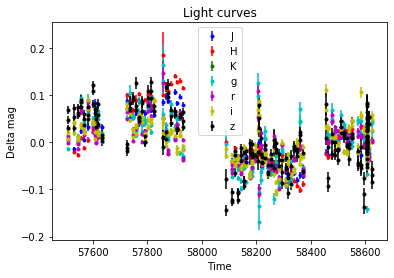

In [35]:
plt.errorbar(xJ, yJ, yJerr,fmt='b.',label='J')
plt.errorbar(xH, yH, yHerr,fmt='r.',label='H')
plt.errorbar(xK, yK, yKerr,fmt='g.',label='K')
plt.errorbar(xg, yg, ygerr,fmt='c.',label='g')
plt.errorbar(xr, yr, yrerr,fmt='m.',label='r')
plt.errorbar(xi, yi, yierr,fmt='y.',label='i')
plt.errorbar(xz, yz, yzerr,fmt='k.',label='z')

#plt.ylim(-1,1)
#plt.xlim(58200,58400)
plt.title('Light curves')
plt.xlabel('Time')
plt.ylabel('Delta mag')
plt.legend()